In [181]:
import jax
import jax.numpy as jnp

import numpy as np
import matplotlib.pyplot as plt

In [182]:
plt.style.use("fivethirtyeight")

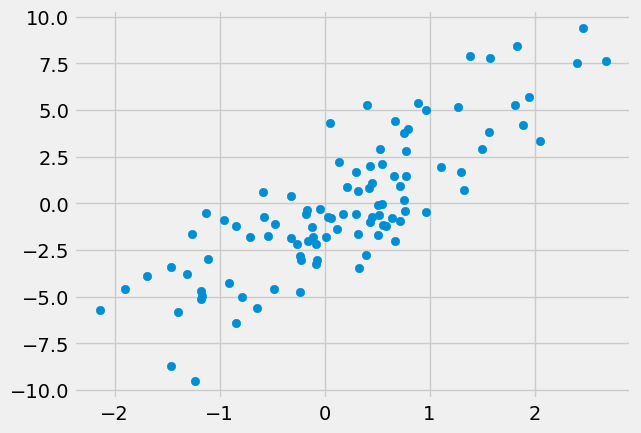

In [269]:
xs = np.random.normal(size=(100,))
noise = np.random.normal(scale=2, size=(100,))
ys = xs * 3 - 1 + noise

plt.scatter(xs, ys);

In [270]:
def model(theta, x):
  """Computes wx + b on a batch of input x."""
  w, b = theta
  return w * x + b

In [271]:
def loss_fn(theta, x, y):
  prediction = model(theta, x)
  return jnp.mean((prediction-y)**2)

In [272]:
def update(theta, x, y, lr=0.1):
  return theta - lr * jax.grad(loss_fn)(theta, x, y)

In [273]:
#theta = jnp.array([4., 4.])

In [274]:
%%timeit

n = 40
initial_weights = [-4., -2.]
thetas = []

theta = jnp.array(initial_weights)
for _ in range(n):
  theta = update(theta, xs, ys, lr=0.1)
  thetas.append(theta)

#plt.scatter(xs, ys)
#plt.title("Linear Model")
#for i in range(n):
#  plt.plot(xs, model(thetas[i], xs), color="red", alpha=0.1)

#w, b = theta
#print(f"w: {w:<.2f}, b: {b:<.2f}")

263 ms ± 22.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [275]:
update_jit = jax.jit(update)

In [276]:
%%timeit

n = 40
initial_weights = [-4., -2.]
thetas = []

theta = jnp.array(initial_weights)
for _ in range(n):
  theta = update_jit(theta, xs, ys, lr=0.1)
  thetas.append(theta)

#plt.scatter(xs, ys)
#plt.title("Linear Model")
#for i in range(n):
#  plt.plot(xs, model(thetas[i], xs), color="red", alpha=0.1)

#w, b = theta
#print(f"w: {w:<.2f}, b: {b:<.2f}")

591 µs ± 61.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [277]:
jnp.arange(10, 102, 10)

Array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100], dtype=int32)

Text(0.5, 0.98, 'Offline Learning')

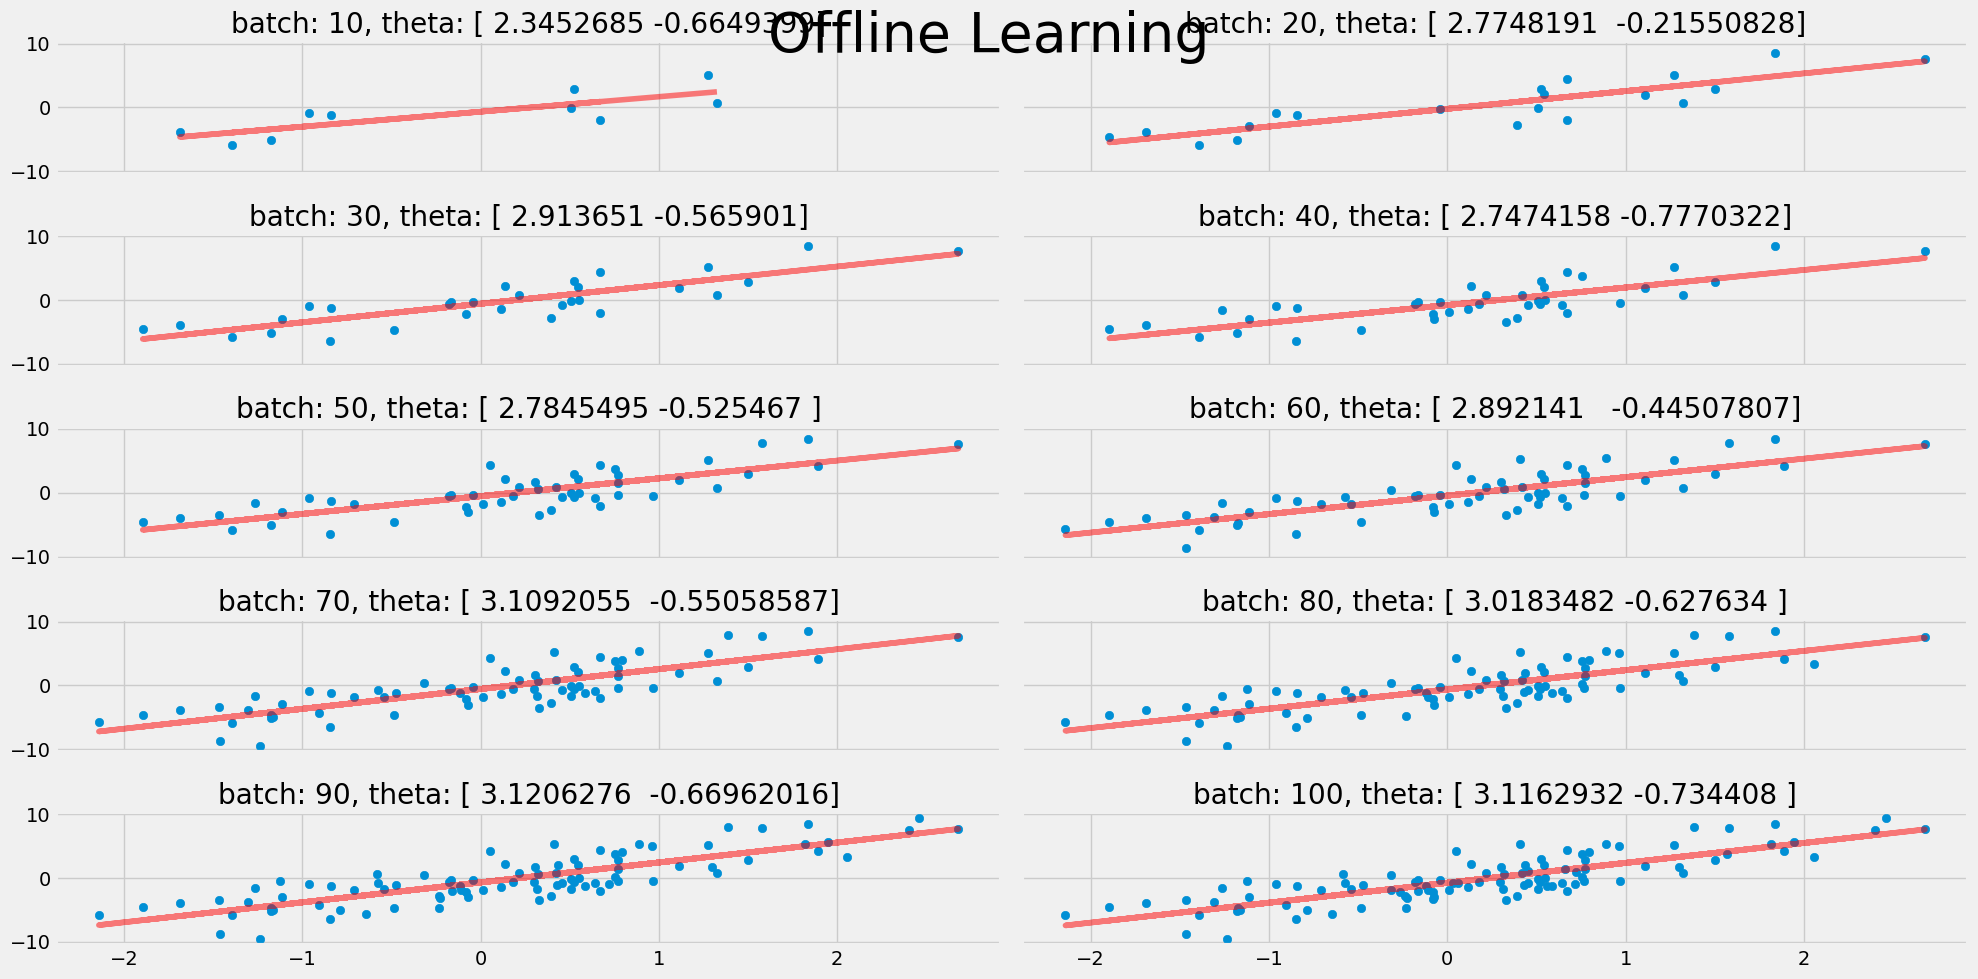

In [313]:
fig, ax = plt.subplots(ncols=2, nrows=5, figsize=(20,10), sharex=True, sharey=True)
ax = ax.flatten()

n = 20
initial_weights = [-4., -2.]
theta = jnp.array(initial_weights)


for i, batch in enumerate(jnp.arange(10, 102, 10)):
  for _ in range(n):
    theta = update_jit(theta, xs[:batch], ys[:batch], lr=0.1)
  
  ax[i].scatter(xs[:batch], ys[:batch])
  ax[i].set_title(f"batch: {batch}, theta: {theta}")
  ax[i].plot(xs[:batch], model(theta, xs[:batch]), color="red", alpha=0.5)

plt.tight_layout()
plt.suptitle("Offline Learning", size=40)

In [332]:
batch**2

Array(10000, dtype=int32)

Text(0.5, 0.98, 'Batch Learning')

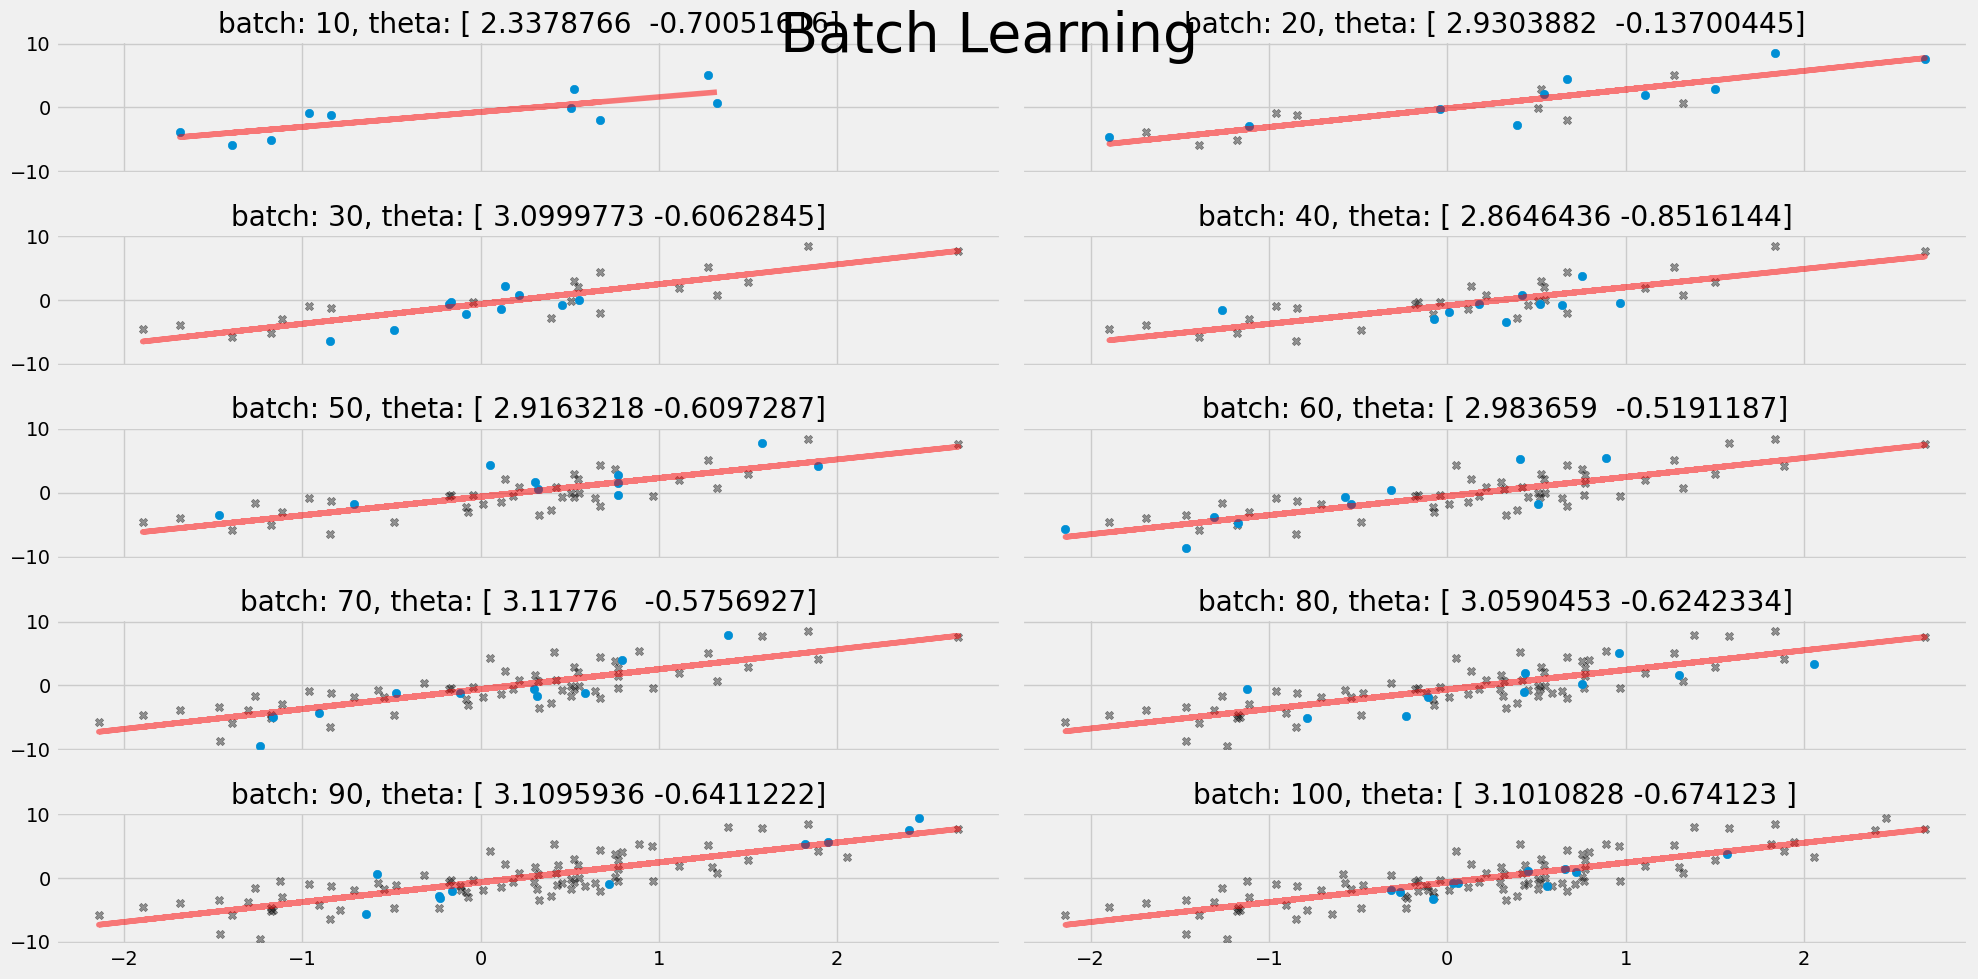

In [331]:
fig, ax = plt.subplots(ncols=2, nrows=5, figsize=(20,10), sharex=True, sharey=True)
ax = ax.flatten()

n = 50
initial_weights = [-4., -12.]
theta = jnp.array(initial_weights)


for i, batch in enumerate(jnp.arange(10, 102, 10)):
  for _ in range(n):
    theta = update_jit(theta, xs[batch-10:batch], ys[batch-10:batch], lr=5/batch**2)
  
  ax[i].scatter(xs[:batch-10], ys[:batch-10], color="black", alpha=0.4, marker="X")
  ax[i].scatter(xs[batch-10:batch], ys[batch-10:batch])
  ax[i].set_title(f"batch: {batch}, theta: {theta}")
  ax[i].plot(xs[:batch], model(theta, xs[:batch]), color="red", alpha=0.5)

plt.tight_layout()
plt.suptitle("Batch Learning", size=40)

Text(0.5, 0.98, 'Batch Learning')

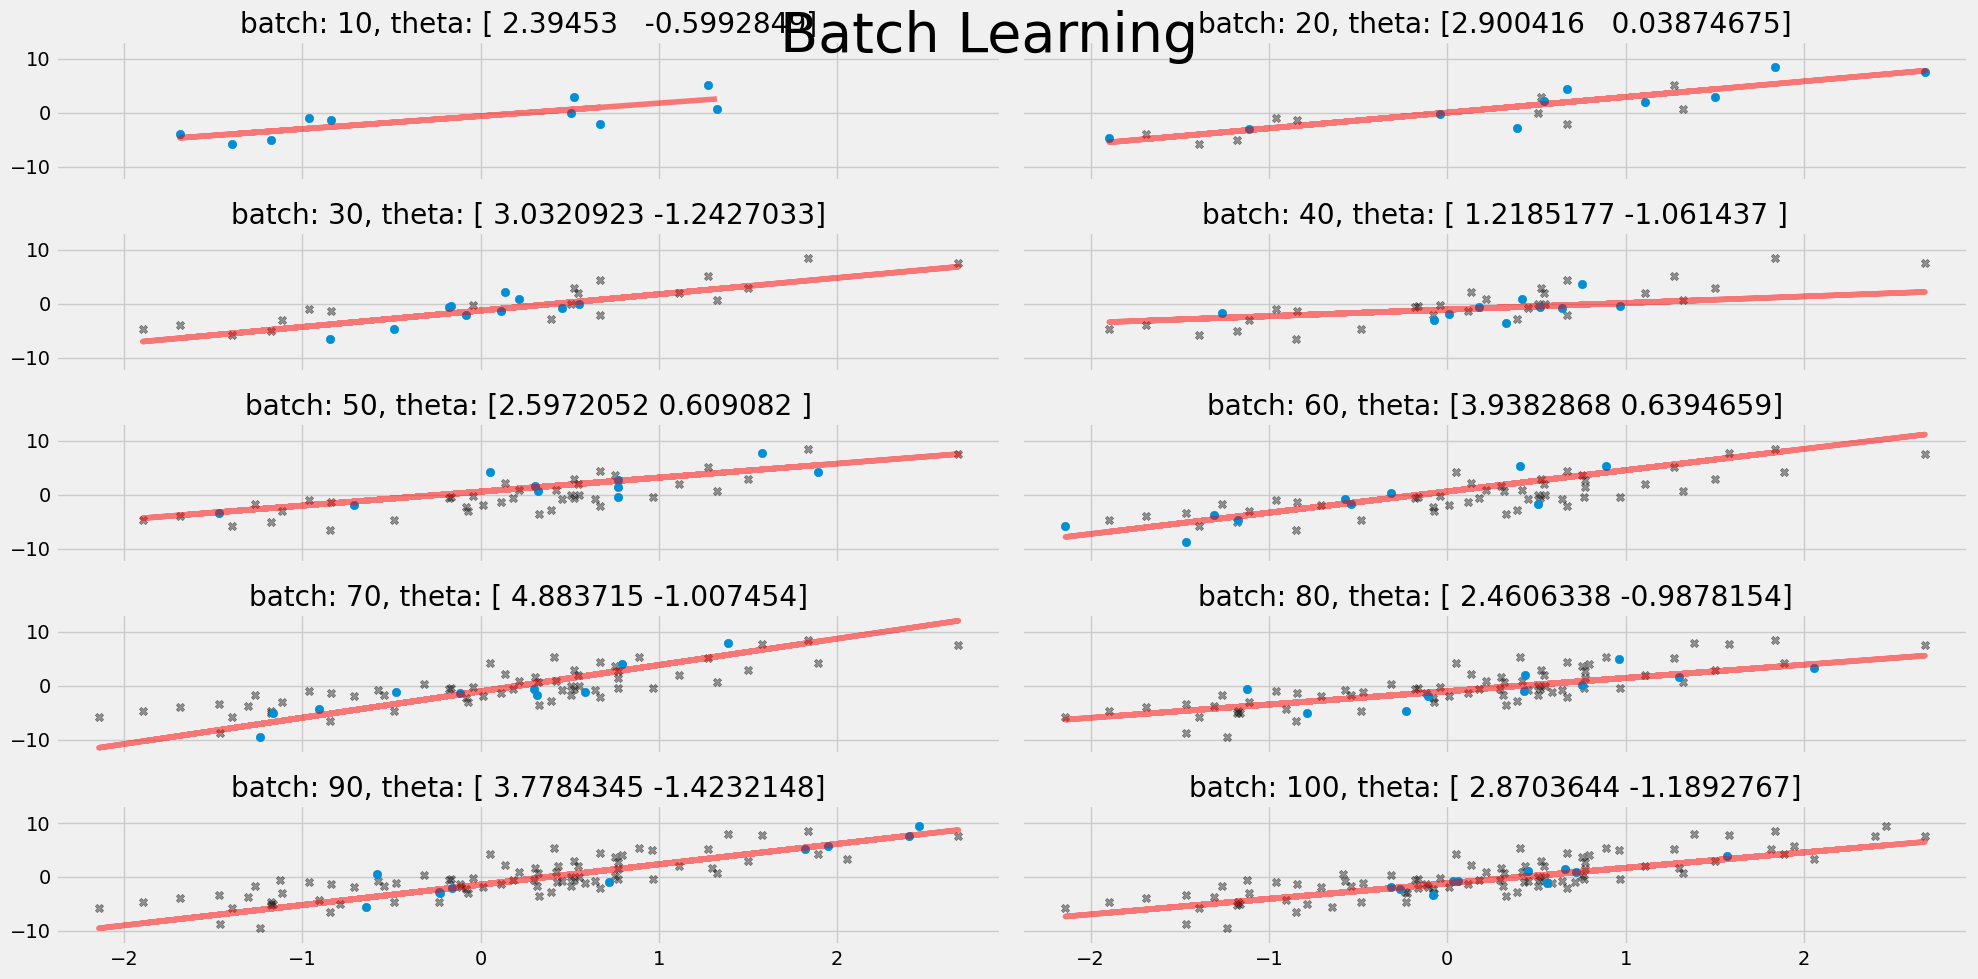

In [320]:
fig, ax = plt.subplots(ncols=2, nrows=5, figsize=(20,10), sharex=True, sharey=True)
ax = ax.flatten()

n = 50
initial_weights = [-4., -2.]
theta = jnp.array(initial_weights)


for i, batch in enumerate(jnp.arange(10, 102, 10)):
  theta = jnp.array(initial_weights)
  for _ in range(n):
    theta = update_jit(theta, xs[batch-10:batch], ys[batch-10:batch], lr=0.1)
  
  ax[i].scatter(xs[:batch-10], ys[:batch-10], color="black", alpha=0.4, marker="X")
  ax[i].scatter(xs[batch-10:batch], ys[batch-10:batch])
  ax[i].set_title(f"batch: {batch}, theta: {theta}")
  ax[i].plot(xs[:batch], model(theta, xs[:batch]), color="red", alpha=0.5)

plt.tight_layout()
plt.suptitle("Batch Learning", size=40)